<a href="https://colab.research.google.com/github/Pdaret/MIO-TCD-CNN/blob/main/MIO_TCD_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'red'># Part 1</font>

# Under Fitting Model 

To induce underfitting in our model, we can make it less complex or reduce the capacity of the model. Here are a few modifications we can make to our model to encourage underfitting:

1. Decrease the number of filters in the convolutional layers: By reducing the number of filters, the model will extract fewer features, leading to a simpler representation.

2. Remove a convolutional layer: Removing a layer reduces the depth of the model and further simplifies it.

3. Reduce the number of neurons in the dense layer: By decreasing the number of neurons, you reduce the complexity of the model's fully connected layers.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/FCI_HW02/HW02-Practical/Dataset/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/FCI_HW02/HW02-Practical/Dataset/valid',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 12566 images belonging to 5 classes.
Found 1701 images belonging to 5 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Epoch 1/10
100/100 [==============================] - 66s 647ms/step - loss: 1.6657 - accuracy: 0.2138 - val_loss: 1.6083 - val_accuracy: 0.0037
Epoch 2/10
100/100 [==============================] - 59s 580ms/step - loss: 1.6093 - accuracy: 0.2091 - val_loss: 1.6167 - val_accuracy: 0.0031
Epoch 3/10
100/100 [==============================] - 55s 547ms/step - loss: 1.6080 - accuracy: 0.2166 - val_loss: 1.6240 - val_accuracy: 0.0037
Epoch 4/10
100/100 [==============================] - 49s 488ms/step - loss: 1.6085 - accuracy: 0.2060 - val_loss: 1.6281 - val_accuracy: 0.0025
Epoch 5/10
100/100 [==============================] - 53s 520ms/step - loss: 1.6087 - accuracy: 0.2103 - val_loss: 1.6251 - val_accuracy: 0.0037
Epoch 6/10
100/100 [==============================] - 50s 496ms/step - loss: 1.6080 - accuracy: 0.2069 - val_loss: 1.6267 - val_accuracy: 0.2463
Epoch 7/10
100/100 [==============================] - 52s 512ms/step - loss: 1.6065 - accuracy: 0.2266 - val_loss: 1.6372 - val_ac

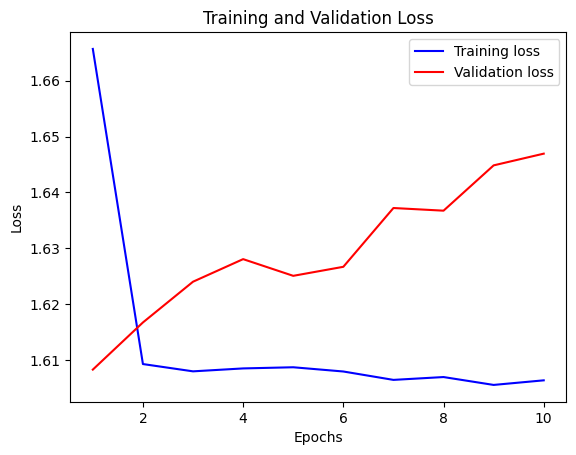

In [ ]:
import matplotlib.pyplot as plt

# Accessing the loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the loss values
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/FCI_HW02/HW02-Practical/Dataset/test',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

score = model.evaluate_generator(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Found 5000 images belonging to 5 classes.


<ipython-input-11-cacc37e2706b>:9: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator)


Test loss: 1.6117362976074219
Test accuracy: 0.20000000298023224


# Over Fitting Model
To induce overfitting in our model, we can increase its capacity or complexity. Here are a few modifications we can make to our model to encourage overfitting:

1. Increase the number of filters in the convolutional layers: By increasing the number of filters, the model can learn more complex features from the input data.

2. Add more convolutional layers: Increasing the depth of the model allows it to learn more intricate patterns in the data.

3. Increase the number of neurons in the dense layer: By adding more neurons, the model can capture more complex relationships in the data.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Dropout , Flatten , MaxPooling2D, Activation

model = Sequential()
model.add(Conv2D(64, (3, 3),activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(
        train_generator,
        steps_per_epoch=100,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/10
100/100 [==============================] - 896s 9s/step - loss: 1.4997 - accuracy: 0.3422 - val_loss: 1.1738 - val_accuracy: 0.6525
Epoch 2/10
100/100 [==============================] - 530s 5s/step - loss: 1.0021 - accuracy: 0.6072 - val_loss: 1.1460 - val_accuracy: 0.5619
Epoch 3/10
100/100 [==============================] - 485s 5s/step - loss: 0.7711 - accuracy: 0.7209 - val_loss: 1.0196 - val_accuracy: 0.6550
Epoch 4/10
100/100 [==============================] - 476s 5s/step - loss: 0.7115 - accuracy: 0.7409 - val_loss: 0.8135 - val_accuracy: 0.7250
Epoch 5/10
100/100 [==============================] - 468s 5s/step - loss: 0.5990 - accuracy: 0.7912 - val_loss: 0.9165 - val_accuracy: 0.6750
Epoch 6/10
100/100 [==============================] - 472s 5s/step - loss: 0.5738 - accuracy: 0.7941 - val_loss: 0.9323 - val_accuracy: 0.6994
Epoch 7/10
100/100 [==============================] - 442s 4s/step - loss: 0.5335 - accuracy: 0.8184 - val_loss: 0.7897 - val_accuracy: 0.7250

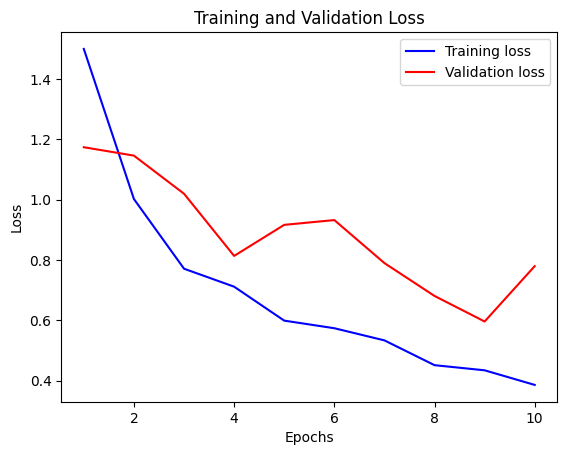

In [ ]:
import matplotlib.pyplot as plt

# Accessing the loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the loss values
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Colab Notebooks/FCI_HW02/HW02-Practical/Dataset/test',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

score = model.evaluate_generator(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Found 5000 images belonging to 5 classes.


<ipython-input-7-cacc37e2706b>:9: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator)


Test loss: 0.7172591090202332
Test accuracy: 0.7674000263214111


# Best Fitting Model
To perform hyperparameter tuning for our model using two different methods, specifically setting the learning rate using `grid search` and setting the learning rate using the `wandb` or `comet` libraries, we can follow the code snippets provided below.

**First, I'll demonstrate how to set the learning rate using grid search. For this purpose, we'll use the `GridSearchCV` class from the `sklearn` library. Here's an code:**

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the model architecture
def create_model(learning_rate=0.001):
    model = Sequential()
    model.add(Conv2D(64, (3, 3),activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the Keras classifier for use in GridSearchCV
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Define the grid search parameters
learning_rate = [0.001, 0.01, 0.1]

param_grid = dict(learning_rate=learning_rate)

# Load the data from the generator
X_train, y_train = next(train_generator)
X_val, y_val = next(validation_generator)

# Create the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train, validation_data=(X_val, y_val))

# Print the best parameters and score
print("Best parameters: ", grid_result.best_params_)
print("Best score: ", grid_result.best_score_)

<ipython-input-29-e7bbefbef768>:29: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


Best parameters:  {'learning_rate': 0.001}
Best score:  0.5030303200085958


**now we plot the best model loss**

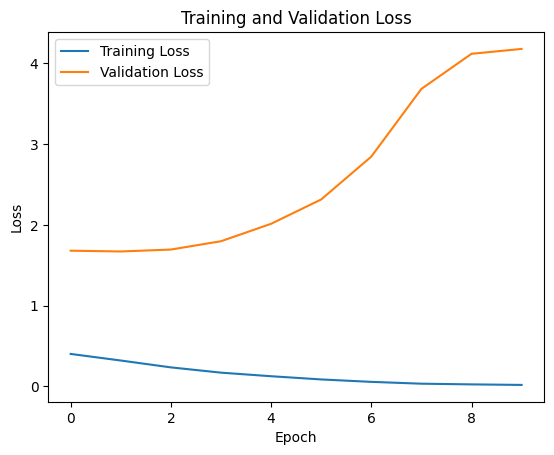

In [ ]:
import matplotlib.pyplot as plt

# Get the best parameters and corresponding model
best_params = grid_result.best_params_
best_model = grid_result.best_estimator_.model

# Train the model with the best parameters
history = best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=0)

# Plot the loss on the training and validation sets
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Now, let's move on to setting the learning rate using the `wandb` or `comet` libraries. These libraries allow us to track and log experiments, including hyperparameters. Here's an code snippets using `wandb`:**

In [ ]:
import wandb

# Initialize wandb
wandb.init(project='CNN-MIO-TCD', entity='pdaret')

# Define the model architecture
model = Sequential()
model.add(Conv2D(64, (3, 3),activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


# Set the learning rate using wandb
learning_rate = wandb.config.learning_rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model and log the metrics
model.fit(train_generator, steps_per_epoch=100, epochs=10, validation_data=validation_generator, validation_steps=50)
wandb.log({'train_loss': model.history.history['loss'], 'val_loss': model.history.history['val_loss']})

AttributeError: ignored

In [ ]:
# Retrieve the logged loss values from WandB run
train_loss = wandb.history['train_loss']
val_loss = wandb.history['val_loss']

# Plot the loss on the training and validation sets
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# <font color='red'># Part 2</font>

in this phase we use `resnet18` to create a <font color = 'blue'>transfer learning</font> model and train it with our `MIO-TCD` dataset.then tune the `learning rate` hyper parameter using `wandb` library by `random search` method.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
import wandb
from random import uniform

In [ ]:
# Initialize wandb for experiment tracking
wandb.init(project='Transfer-learning')

In [3]:
# Define the data transformations for training and validation sets
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(128), # Randomly crop the image to size 128x128
        transforms.RandomHorizontalFlip(), # Randomly flip the image horizontally
        transforms.ToTensor(),  # Convert the image to a tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((128, 128)),  # Resize the image to 128x128
        transforms.ToTensor(), # Convert the image to a tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # Normalize the image with mean and standard deviation
    ])
}

In [ ]:
# Set the directory paths for the dataset
data_dir = 'path/to/dataset'
train_dir = data_dir + '/train'
val_dir = data_dir + '/valid'

In [ ]:
# Load the training and validation datasets using ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
val_data = datasets.ImageFolder(val_dir, transform=data_transforms['valid'])

# Create data loaders for training and validation
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32)

# Define the device for training (GPU if available, otherwise CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# Freeze the parameters of the pre-trained model
for param in model.parameters():
    param.requires_grad = False

# Get the number of input features for the last fully connected layer
num_features = model.fc.in_features

# Replace the last fully connected layer with a new one (output size 5)
model.fc = nn.Linear(num_features, 5)

# Transfer the model to the device
model = model.to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

In [ ]:
def train_model(learning_rate):
    # Update the optimizer with the new learning rate
    optimizer = optim.SGD(model.fc.parameters(), lr=learning_rate, momentum=0.9)

    # Rest of your training and evaluation code here
    num_epochs = 10

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        print('-' * 10)

        # Training phase
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct_preds = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                # Calculate the number of correct predictions
                _, preds = torch.max(outputs, 1)
                correct_preds += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(train_loader)
        epoch_val_loss = val_loss / len(val_loader)
        epoch_acc = correct_preds / len(val_loader.dataset)

        # Log the learning rate, accuracy, and loss to wandb
        wandb.log({'learning_rate': learning_rate, 'accuracy': epoch_acc, 'loss': epoch_val_loss})

    return epoch_acc


In [ ]:
num_searches = 10  # Number of random searches
best_accuracy = 0.0
best_learning_rate = None

for search in range(num_searches):
    learning_rate = uniform(0.0001, 0.01)  # Generate a random learning rate

    # Train and evaluate the model with the current learning rate
    accuracy = train_model(learning_rate)

    # Check if the current accuracy is better than the previous best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_learning_rate = learning_rate

print(f"Best Learning Rate: {best_learning_rate}")

**now we want to measure the accuracy of our model in `fine tuning` process.to do this, first we Update the model to allow fine-tuning ,then Adjust the optimizer to include all model parameters and finally Run the training and evaluation loop as before.**

In [ ]:
# Set requires_grad=True for all parameters
for param in model.parameters():
    param.requires_grad = True

# Adjust the optimizer to include all model parameters
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

num_epochs = 10

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print('-' * 10)

    # Training phase
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_preds = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader)
    epoch_val_loss = val_loss / len(val_loader)
    epoch_acc = correct_preds / len(val_loader.dataset)

    # Log the learning rate, accuracy, and loss to wandb
    wandb.log({'learning_rate': learning_rate, 'accuracy': epoch_acc, 'loss': epoch_val_loss})

    print(f"Train Loss: {epoch_loss:.4f}")
    print(f"Val Loss: {epoch_val_loss:.4f}")
    print(f"Val Accuracy: {epoch_acc:.4f}")
    print()

**now we want to measure the model accuracy in `feature extraction` phase.to do this, we first Keep the model parameters frozen for `feature extraction`,then,Adjust the optimizer to only include the parameters of the classifier and finally Run the training and evaluation loop as before.**

In [ ]:
# Set requires_grad=False for all parameters except the classifier
for name, param in model.named_parameters():
    if "fc" not in name:
        param.requires_grad = False

# Adjust the optimizer to only include the parameters of the classifier
optimizer = optim.SGD(model.fc.parameters(), lr=learning_rate, momentum=0.9)

num_epochs = 10

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    print('-' * 10)

    # Training phase
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_preds = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader)
    epoch_val_loss = val_loss / len(val_loader)
    epoch_acc = correct_preds / len(val_loader.dataset)

    # Log the learning rate, accuracy, and loss to wandb
    wandb.log({'learning_rate': learning_rate, 'accuracy': epoch_acc, 'loss': epoch_val_loss})

    print(f"Train Loss: {epoch_loss:.4f}")
    print(f"Val Loss: {epoch_val_loss:.4f}")
    print(f"Val Accuracy: {epoch_acc:.4f}")
    print()